In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [8]:
# Load data
df = pd.read_csv("GlobalWeatherRepository.csv")

In [12]:
# 🔍 Overview of the dataset
print("🔎 Dataset Preview:")
print(df.head())

print("\n📏 Dataset Shape:", df.shape)
print("\n📋 Column Info:")
print(df.info())

print("\n🧮 Missing Values:")
print(df.isnull().sum())

print("\n📊 Basic Statistics:")
print(df.describe())


🔎 Dataset Preview:
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    

In [14]:
# 👀 Check missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\nColumns with Missing Values:\n", missing)


Columns with Missing Values:
 Series([], dtype: int64)


In [16]:
# Create travel safety label (0 = Unsafe, 1 = Caution, 2 = Safe)
def assign_travel_safety_label(row):
    if (
        row['visibility_km'] < 2 or
        row['gust_kph'] > 50 or
        row['humidity'] > 90 or
        row['air_quality_PM2.5'] > 75 or
        row['air_quality_us-epa-index'] >= 4
    ):
        return 0
    elif (
        row['visibility_km'] < 5 or
        35 < row['gust_kph'] <= 50 or
        75 < row['humidity'] <= 90 or
        35 < row['air_quality_PM2.5'] <= 75 or
        2 <= row['air_quality_us-epa-index'] < 4
    ):
        return 1
    else:
        return 2

df['travel_safety'] = df.apply(assign_travel_safety_label, axis=1)


In [18]:
features = [
    'temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'precip_mm',
    'cloud', 'visibility_km', 'uv_index', 'gust_kph',
    'air_quality_PM2.5', 'air_quality_us-epa-index'
]

X = df[features]
y = df['travel_safety']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode targets for softmax
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)


In [20]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)


Epoch 1/50


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1271/1271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7414 - loss: 0.5943 - val_accuracy: 0.9491 - val_loss: 0.1642
Epoch 2/50
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9153 - loss: 0.2208 - val_accuracy: 0.9755 - val_loss: 0.0999
Epoch 3/50
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9431 - loss: 0.1498 - val_accuracy: 0.9825 - val_loss: 0.0665
Epoch 4/50
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9567 - loss: 0.1119 - val_accuracy: 0.9885 - val_loss: 0.0456
Epoch 5/50
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9677 - loss: 0.0879 - val_accuracy: 0.9849 - val_loss: 0.0389
Epoch 6/50
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9724 - loss: 0.0748 - val_accuracy: 0.9882 - val_loss: 0.0318
Epoch 7/50
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0637 - val_accuracy: 0.9924 - val_loss: 0.0245
Epoch 8/50
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0583 - val_accurac

In [73]:
# Evaluate
loss, acc = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Accuracy: {acc:.2f}")

# Predict
y_pred_probs = model.predict(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Unsafe", "Caution", "Safe"]))


398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0104  
Test Accuracy: 1.00
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.99      1.00      0.99      2828
     Caution       1.00      1.00      1.00      6503
        Safe       1.00      1.00      1.00      3376

    accuracy                           1.00     12707
   macro avg       1.00      1.00      1.00     12707
weighted avg       1.00      1.00      1.00     12707



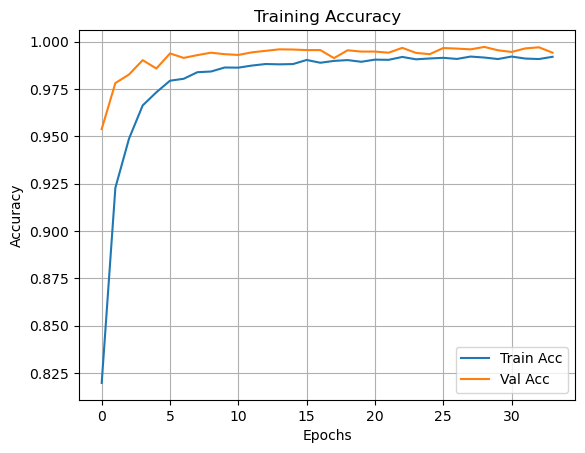

In [75]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


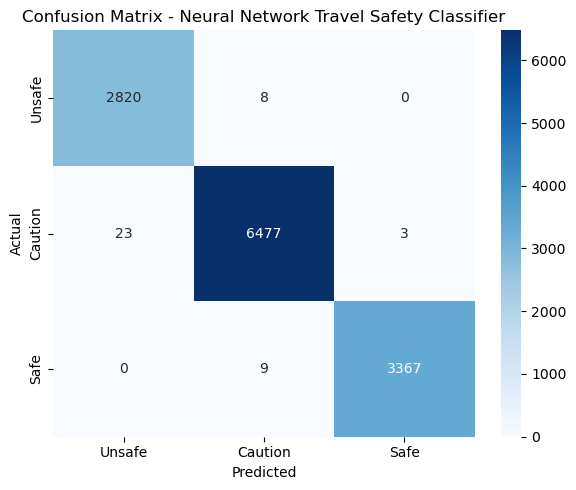

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unsafe", "Caution", "Safe"],
            yticklabels=["Unsafe", "Caution", "Safe"])
plt.title("Confusion Matrix - Neural Network Travel Safety Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
